In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
from scipy.ndimage.interpolation import zoom
import pandas as pd
import collections

In [4]:
#base = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/ACI_baseline/'

for timetype in ['overlap', 'timestep']:
    for baseline_name in ['ACI_noRound', 'ACI_Round']:
        base = ('/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/'
                'predictions/baselines/acousticIndices/%sFiles/' % timetype)
        df = pd.read_csv(base + 'goldenTestSet_%s_%s.csv' % (timetype, baseline_name))

        savedir = ('/media/michael/Engage/data/audio/alison_data/golden_set/predictions/'
                    '%s_%s_baseline/biotic/per_file_predictions/' % (timetype, baseline_name))

        if not os.path.exists(savedir):
            os.makedirs(savedir)

        for key in df.keys()[1:]:

            # loading ACI pred and gt
            savepath = savedir + key.replace('.wav', '.pkl')
            preds = df[key]
            with open(savepath.replace('%s_%s_baseline' % (timetype, baseline_name), 'mel32_large_test_golden_fullsplit')) as f:
                gt, _ = pickle.load(f)

            # converting to correct shape and format
            factor = float(gt.shape[0]) / preds.shape[0]
            preds_conv = zoom(preds, factor, order=1)
            preds_conv = np.vstack((1.0 - preds_conv, preds_conv)).T

            # saving to disk
            with open(savepath, 'w') as f:
                pickle.dump((gt, preds_conv), f, -1)
            print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


# Doing NDSI baseline

In [3]:
baseline_name = 'NDSI'

for classname, csv_key in [('biotic', 'Biophony'), ('anthrop', 'Anthrophony')]:
    for timetype in ['overlap', 'timestep']:

        # sorting out folder and load paths
        foldername = '%s_%s_baseline' % (timetype, baseline_name)
        savedir = ('/media/michael/Engage/data/audio/alison_data/golden_set/predictions/'
                '%s/%s/per_file_predictions/' % (foldername, classname))

        if not os.path.exists(savedir):
            os.makedirs(savedir)

        base = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/baselines/acousticIndices/%sFiles/' % timetype
        res = pd.read_csv(base + 'goldenTestSet_%s_%s.csv' % (timetype, baseline_name))

        # extracting all results from the csv file
        fname_to_res = collections.defaultdict(list)
        fname_to_times = collections.defaultdict(list)
        for _, row in res.iterrows():
            fname = '_'.join(row['Filename'].split('_')[:-1])
            fname_to_res[fname].append(row[csv_key])
            fname_to_times[fname].append(float(row['Filename'].split('_')[-1][:-4]))

        # for each original file, resize and save the results
        for fname in fname_to_res:
            savepath = savedir + fname + '.pkl'
            gt, _ = pickle.load(open(savepath.replace(foldername, 'mel32_large_test_golden_fullsplit')))

            # converting to correct shape and format
            preds = np.array(fname_to_res[fname])
            sort_idxs = np.argsort(fname_to_times[fname])
            preds = preds[sort_idxs]

            factor = float(gt.shape[0]) / preds.shape[0]
            preds_conv = zoom(preds, factor, order=1)
    #         preds_conv += preds_conv.min()
    #         preds_conv /= preds_conv.max()
            preds_conv = np.vstack((1.0 - preds_conv, preds_conv)).T

            # saving to disk
            with open(savepath, 'w') as f:
                pickle.dump((gt, preds_conv), f, -1)

# Doing BI baseline

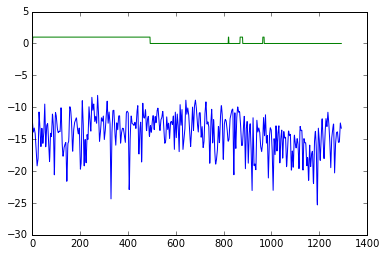

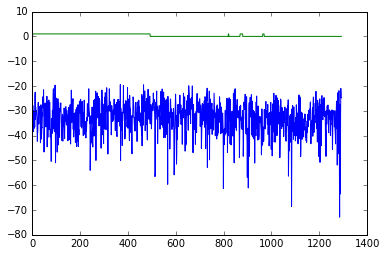

In [6]:
baseline_name = 'BI'

for timetype in ['overlap', 'timestep']:

    # sorting out folder and load paths
    foldername = '%s_%s_baseline' % (timetype, baseline_name)
    savedir = ('/media/michael/Engage/data/audio/alison_data/golden_set/predictions/'
            '%s/biotic/per_file_predictions/' % foldername)
    
    if not os.path.exists(savedir):
        os.makedirs(savedir)

    base = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/baselines/acousticIndices/%sFiles/' % timetype
    res = pd.read_csv(base + 'goldenTestSet_%s_%s.csv' % (timetype, baseline_name))

    # extracting all results from the csv file
    fname_to_res = collections.defaultdict(list)
    for _, row in res.iterrows():
        fname = '_'.join(row['FILENAME'].split('_')[:-1])
        fname_to_res[fname].append(row['LEFT_CHANNEL'])
        
    # for each original file, resize and save the results
    for fname in fname_to_res:
        savepath = savedir + fname + '.pkl'
        gt, _ = pickle.load(open(savepath.replace(foldername, 'mel32_large_test_golden_fullsplit')))

        # converting to correct shape and format
        preds = np.array(fname_to_res[fname])
        factor = float(gt.shape[0]) / preds.shape[0]
        preds_conv = zoom(preds, factor, order=1)
#         preds_conv += preds_conv.min()
#         preds_conv /= preds_conv.max()
        preds_conv = np.vstack((1.0 - preds_conv, preds_conv)).T

        # saving to disk
        with open(savepath, 'w') as f:
            pickle.dump((gt, preds_conv), f, -1)

    plt.figure()
    plt.plot(preds_conv[:, 0])
    plt.plot(gt)